In [76]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from aau2v.config import ModelConfig, TrainerConfig
from aau2v.dataset_center import load_dataset_center
from aau2v.trainer import PyTorchTrainer
from aau2v.model import load_model

In [77]:
trainer_config = TrainerConfig(
    dataset_name="toydata-paper",
    epochs=3,
    ignore_saved_model=True,
    load_dataset=False,
    model_dir="cache/model/",
)
model_config = ModelConfig(
    lr=1e-3,
    max_embedding_norm=5,
)

In [78]:
dataset_center = load_dataset_center(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
    data_dir="../data/"
)

dataset_manager does not exist at: cache/dataset/toydata-paper.pickle, create dataset
num_seq: 1000, num_item: 750, num_item_meta: 8, num_seq_meta: 7, num_item_meta_types: 2, num_seq_meta_types: 2
dumping dataset_manager to: cache/dataset/toydata-paper.pickle
dumped dataset_manager to: cache/dataset/toydata-paper.pickle


In [79]:
model = load_model(
    dataset_center=dataset_center,
    trainer_config=trainer_config,
    model_config=model_config
)
trainer = PyTorchTrainer(
    model=model,
    dataset_center=dataset_center,
    trainer_config=trainer_config,
    model_config=model_config,
)
trainer.fit()

100%|██████████| 1094/1094 [00:11<00:00, 96.65it/s] 


train 0.00380797598594408


100%|██████████| 157/157 [00:00<00:00, 254.55it/s]


valid 0.005085288241961768
saved model to cache/model/toydata-paper/attentive.pt


100%|██████████| 1094/1094 [00:11<00:00, 98.09it/s] 


train 0.003278393312221158


100%|██████████| 157/157 [00:00<00:00, 254.89it/s]


valid 0.0035709276526362803
saved model to cache/model/toydata-paper/attentive.pt


100%|██████████| 1094/1094 [00:11<00:00, 97.47it/s]


train 0.0030808040550424696


100%|██████████| 157/157 [00:00<00:00, 252.32it/s]

valid 0.0032982252411582758
saved model to cache/model/toydata-paper/attentive.pt


{'train': [0.00380797598594408, 0.003278393312221158, 0.0030808040550424696],
 'valid': [0.005085288241961768, 0.0035709276526362803, 0.0032982252411582758]}

In [81]:
seq_embedding = {
    seq_name: e_seq
    for seq_name, e_seq in zip(dataset_center.seq_le.classes_, model.seq_embedding)
}
item_embedding = {
    item_name: e_item
    for item_name, e_item in zip(dataset_center.item_le.classes_, model.item_embedding)
}
seq_meta_embedding = {
    seq_meta_name: e_seq_meta
    for seq_meta_name, e_seq_meta in zip(
        dataset_center.seq_meta_le.classes_,
        model.seq_meta_embedding,
    )
}
item_meta_embedding = {
    item_meta_name: e_item_meta
    for item_meta_name, e_item_meta in zip(
        dataset_center.item_meta_le.classes_,
        model.item_meta_embedding,
    )
}

In [82]:
seq_keys = ["u_0_M_20_100_M1", "u_1_M_20_100_M2", "u_2_M_20_100_M3", "u_3_M_20_100_M4", "u_4_M_20_100_M5"]
seq_meta_keys = ["gender:M", "gender:F", "age:20", "age:30", "age:40", "age:50", "age:60"]
item_meta_keys = ["genre:M", "genre:E", "genre:F", "year:1960", "year:1970", "year:1980", "year:1990", "year:2000"]

In [83]:
cmap = "OrRd"

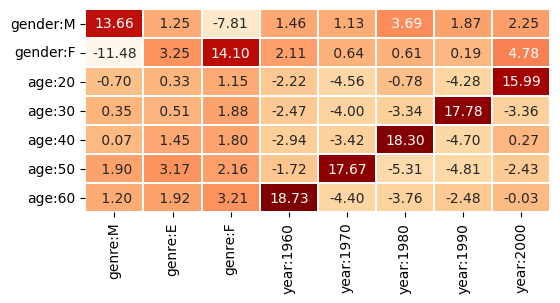

In [84]:
plt.rcParams['figure.subplot.bottom'] = 0.30

data = np.zeros((len(seq_meta_keys), len(item_meta_keys)))
for i, seq_key in enumerate(seq_meta_keys):
    for j, item_key in enumerate(item_meta_keys):
        data[i][j] = torch.dot(seq_meta_embedding[seq_key], item_meta_embedding[item_key])

display_seq_meta_keys = seq_meta_keys
display_item_meta_keys = item_meta_keys

plt.figure(figsize = (6,7/2))
ax = sns.heatmap(data, linewidth=0.2, annot=True, fmt="5.2f",
    yticklabels=display_seq_meta_keys, xticklabels=display_item_meta_keys, cmap=cmap, cbar=False
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.savefig("data/fig_heatmap.pdf", format="pdf", dpi=300)
plt.savefig("data/fig_heatmap.png", format="png", dpi=300)

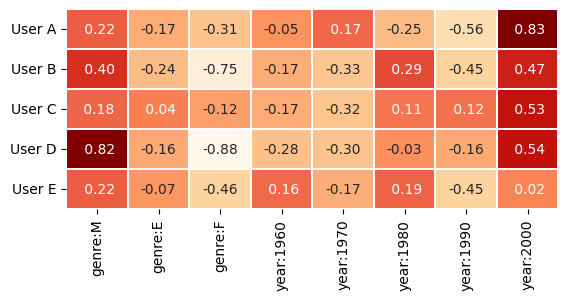

In [85]:
data = np.zeros((len(seq_keys), len(item_meta_keys)))
for i, seq_key in enumerate(seq_keys):
    for j, item_key in enumerate(item_meta_keys):
        data[i][j] = np.dot(seq_embedding[seq_key], item_meta_embedding[item_key])

display_item_meta_keys = item_meta_keys
display_seq_meta_keys = ["User A", "User B", "User C", "User D", "User E"]

plt.figure(figsize = (6,4))
ax = sns.heatmap(data, linewidth=0.2, annot=True, fmt="5.2f",
    yticklabels=display_seq_meta_keys, xticklabels=item_meta_keys, cmap=cmap, cbar=False
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.subplots_adjust(left=0.18, right=1, bottom=0.5, top=1)
plt.savefig("../data/fig_heatmap_user.pdf", format="pdf", dpi=300)
plt.savefig("../data/fig_heatmap_user.png", format="png", dpi=300)